<a href="https://colab.research.google.com/github/JSJeong-me/KOSA-Big-Data_Vision/blob/main/Model/09-27-xgb01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('credit_cards_dataset.csv')

In [3]:
df.tail(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,0,0,47929.0,48905.0,49764.0,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [5]:
df.shape

(30000, 25)

In [6]:
import xgboost as xgb

In [7]:
X = df.drop(['default.payment.next.month'], axis=1).values

In [ ]:
X[0:3,:]

In [ ]:
X[-4:-1,:]

In [10]:
y = df['default.payment.next.month'].values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [13]:
Y_test.shape

(9000,)

XGB DMatrix 설정

In [14]:
dtrain = xgb.DMatrix(X_train, label=Y_train)

In [15]:
dtrain

In [16]:
dtest = xgb.DMatrix(X_test, Y_test)

In [17]:
param = {'max_depth': 10, 'eta': 0.01, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

In [18]:
evallist = [(dtest, 'eval'), (dtrain, 'train')]

In [ ]:
num_round = 200
bst = xgb.train(param, dtrain, num_round, evallist)

In [20]:
ypred = bst.predict(dtest)

In [21]:
type(ypred)

numpy.ndarray

In [22]:
ypred[:3]

array([0.200245  , 0.14451426, 0.21307103], dtype=float32)

In [23]:
import numpy as np


In [24]:
predictions = np.round(ypred)

In [25]:
predictions = np.rint(ypred)

In [26]:
predictions

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [27]:
from sklearn.metrics import recall_score

In [28]:
recall_score(Y_test, predictions)

0.3576530612244898

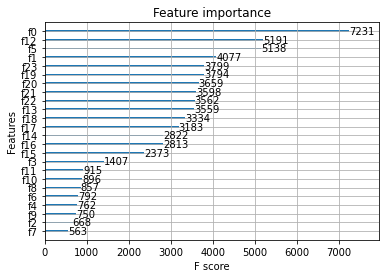

In [29]:
xgb.plot_importance(bst)